In [1]:
#import libraries
import os
import datetime
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [3]:
# Downloading and saving the image prediction data using Requests

""""
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1].split('.')[0]
print(file_name)
response = requests.get(url)
response
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)

import csv        
        
tsv_file = open("image-predictions.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")

for row in read_tsv:
  print(row)        
"""
Image_predictions_df = pd.read_csv("image-predictions.tsv",sep='\t')
Image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_1' is not defined

In [10]:
tweet_data = pd.DataFrame(columns=["a", "b", "c"])
file1 = open('tweet_json.txt', 'r') 
for line in file1.readlines():
    Date = line.split(',')[0].split(':')[1:]
    ID = line.split(',')[1].split(':')[1:]
    ID_STR = line.split(',')[2].split(':')[1:]
    TEXT = line.split(',')[3].split(':')[1:]
    #print(line.split(',')[3].split(':')[1:])


In [11]:
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df = pd.DataFrame(df_list)
api_df.count()
api_df.head()

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [12]:
##Assessing
#we have 3 files archive_df, Image_predictions_df, api_df

In [13]:
Image_predictions_df.info()
archive_df.info()
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int6

In [14]:
Image_predictions_df.describe()
archive_df.describe()
api_df.describe()

,tweet_id,retweet_count,favorite_count,user_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


In [15]:
## Assesing problems
# retweeted_status_timestamp is str
# retweeted_status_id is float
# timestamp is str
# in_reply_to_user_id is float
# in_reply_to_status_id is float
# three separate tables
# dog stages in multiple columns in archive_df
# tweet_id is int in img_predictions_df
#

In [16]:
###cleaning

Image_pred_clean = Image_predictions_df.copy()
archive_clean = archive_df.copy()
tweets_clean = api_df.copy()
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [18]:
Image_pred_clean['tweet_id'] = Image_pred_clean['tweet_id'].astype(str)
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype(str)

archive_clean.info()
Image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
####archive file cleaning
archive_clean['expanded_urls'].dropna(inplace=True)   # drop rows that didn't have image url

archive_clean.iloc[:, -4:  ] = archive_clean.iloc[:, -4:  ].replace('None','')
archive_clean['dog_breed'] = archive_clean['doggo'] +archive_clean['floofer']+archive_clean['pupper']+ archive_clean['puppo'] 
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis =1 , inplace =True)

archive_clean.loc[archive_clean.dog_breed == 'doggopupper', 'dog_breed'] = 'doggo-pupper'
archive_clean.loc[archive_clean.dog_breed == 'doggofloofer', 'dog_breed'] = 'doggo-floofer'
archive_clean.loc[archive_clean.dog_breed == 'doggopuppo', 'dog_breed'] = 'doggo-puppo'

len(archive_clean[archive_clean.dog_breed != 'None'])

archive_clean.dog_breed =archive_clean.dog_breed.replace('' ,np.nan)


In [20]:
from functools import reduce

dfs = [archive_clean, Image_pred_clean, tweets_clean]
df_total = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)


In [21]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  dog_breed                   320 n

In [22]:
df_total = df_total.drop_duplicates()

df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  dog_breed                   320 n

In [23]:
df_total.dog_breed.value_counts()

pupper           210
doggo             67
puppo             23
doggo-pupper      11
floofer            7
doggo-floofer      1
doggo-puppo        1
Name: dog_breed, dtype: int64

In [24]:
df_total.in_reply_to_status_id = df_total['in_reply_to_status_id'].astype(str)
df_total.in_reply_to_user_id = df_total['in_reply_to_user_id'].astype(str)
df_total.retweeted_status_id = df_total['retweeted_status_id'].astype(str)
df_total.retweeted_status_user_id = df_total['retweeted_status_user_id'].astype(str)
df_total['timestamp'] = pd.to_datetime(df_total['timestamp'])
df_total['retweeted_status_timestamp'] = pd.to_datetime(df_total['retweeted_status_timestamp'])

In [25]:
# replace NaNs with median values.
median_retweet = np.median(df_total['retweet_count'].dropna())
median_favorite = np.median(df_total['favorite_count'].dropna())
print(median_retweet, median_favorite)


1408.0 3864.0


In [26]:
df_total['retweet_count'] = df_total['retweet_count'].fillna(median_retweet).astype('int64')
df_total['favorite_count'] = df_total['favorite_count'].fillna(median_favorite).astype('int64')

In [27]:
df_total.rating_denominator.value_counts()


10     2055
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [28]:
##saving
df_total.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)


/home/esraa/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'seaborn' has no attribute 'plt'

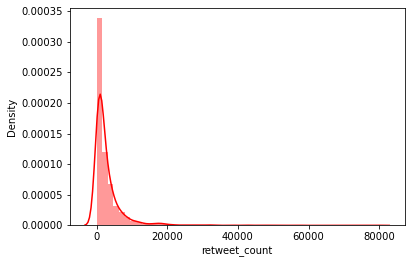

In [29]:
####relationship between retweets and favorites

sns.distplot(df_total.retweet_count, color = 'red', label = 'retweet_count')

sns.plt.show()

/home/esraa/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'seaborn' has no attribute 'plt'

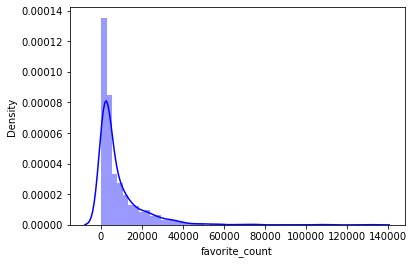

In [30]:
sns.distplot(df_total.favorite_count, color = 'blue', label = 'favorite_count')

sns.plt.show()

<ipython-input-34-d1b9bf9524ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  favorities_lognormed = df_total.favorite_count[df_total.favorite_count <= 0] = 1
<ipython-input-34-d1b9bf9524ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retweets_lognormed = df_total.retweet_count[df_total.retweet_count <= 0] = 1
/home/esraa/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

AttributeError: module 'seaborn' has no attribute 'plt'

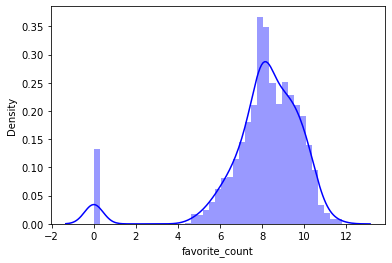

In [34]:
#to handle infinity values
favorities_lognormed = df_total.favorite_count[df_total.favorite_count <= 0] = 1
retweets_lognormed = df_total.retweet_count[df_total.retweet_count <= 0] = 1

sns.distplot(df_total.favorite_count.apply(np.log), color = 'blue', label='Favorite Count (Normalized)')

sns.plt.show()


/home/esraa/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'seaborn' has no attribute 'plt'

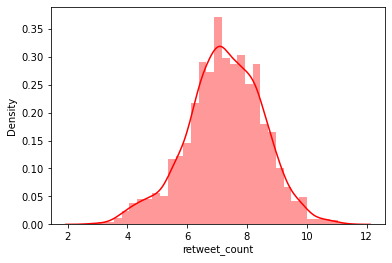

In [35]:
sns.distplot(df_total.retweet_count.apply(np.log), color = 'red', label='Retweet Count (Normalized)')

sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

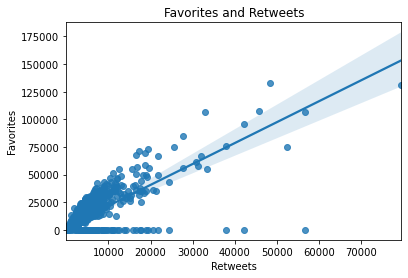

In [36]:
g = sns.regplot(x=df_total.retweet_count, y=df_total.favorite_count)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
sns.plt.show()
fig = g.get_figure()
fig.savefig('scatterplot.png')

In [43]:
df_total.corr()

,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count,user_count
rating_numerator,1.000000,0.198241,-0.000405,-0.009143,-0.028515,-0.020317,-0.033740,-0.003887,-0.028497,0.012787,0.010157,-0.020781
rating_denominator,0.198241,1.000000,-0.004066,-0.004325,0.000980,-0.034461,-0.000518,0.006801,0.004997,-0.022173,-0.026395,0.005238
img_num,-0.000405,-0.004066,1.000000,0.203071,0.026060,-0.159690,0.045653,-0.139454,0.059565,0.105534,0.132241,-0.209110
p1_conf,-0.009143,-0.004325,0.203071,1.000000,0.118777,-0.511547,0.131969,-0.709583,0.109022,0.044739,0.076078,-0.078769
p1_dog,-0.028515,0.000980,0.026060,0.118777,1.000000,0.112147,0.634661,0.048809,0.555778,0.006092,0.056156,-0.119247
p2_conf,-0.020317,-0.034461,-0.159690,-0.511547,0.112147,1.000000,0.100462,0.478953,0.067387,-0.008619,-0.022787,-0.013615
p2_dog,-0.033740,-0.000518,0.045653,0.131969,0.634661,0.100462,1.000000,0.042869,0.550166,0.017197,0.060114,-0.118816
p3_conf,-0.003887,0.006801,-0.139454,-0.709583,0.048809,0.478953,0.042869,1.000000,0.041768,-0.035511,-0.053427,0.029591
p3_dog,-0.028497,0.004997,0.059565,0.109022,0.555778,0.067387,0.550166,0.041768,1.000000,0.006140,0.043928,-0.096398
retweet_count,0.012787,-0.022173,0.105534,0.044739,0.006092,-0.008619,0.017197,-0.035511,0.006140,1.000000,0.790481,-0.366378
